![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/77/IOC_Logo.svg/2341px-IOC_Logo.svg.png)

# Introduction

Welcome to your first day as an analyst working for the IOC! The IOC is at the very heart of world sport, supporting every Olympic Movement stakeholder, promoting Olympism worldwide, and overseeing the regular celebration of the Olympic Games.

For a moment of glory on the medalist podium, elite athletes dedicate *everything* to their sport. Olympics medalists from 1896 through 2016 comprise the dataset you'll be working with. Who are the youngest and oldest medalists of all time? Are there physical differences between Summer Olympics medalists and Winter Olympics medalists? You're about to use your data coding chops to find out!

You'll start this Milestone assignment by cleaning and filtering the data. So many of your Python skills that you've learned so far will be at play. Are you up for it? Let's go!

### Dataset Description

The dataset is stored in a .csv file named `olympics.csv`. It contains the following columns:

* **ID**: A unique identifying number of each athlete
* **Name**: The name of each athlete
* **Sex**: M or F
* **Age**: The age of an athlete, in years, at the time they competed.
* **Height**: The height of an athlete, in centimeters
* **Weight**: The weight of an athlete, in kilograms
* **Team**: The name of the athlete’s team. Not always the name of a country.
* **NOC**: National Olympic Committee’s 3 letter code
* **Games**: Year and season
* **Season**: Summer or Winter
* **City**: Host city
* **Sport**: The sport or category of an olympic event/activity
* **Event**: specific event within a sport, e.g. Men’s 400 meters breaststroke.
* **Medal**: Gold, Silver, Bronze
* **Region**: Name of athlete’s country



# Task 1: Data Inspection

![](https://media.giphy.com/media/42wQXwITfQbDGKqUP7/giphy.gif)

In [1]:
# import the pandas library
import pandas as pd

In [2]:
# Load in the data
df = pd.read_csv('datasets/olympics.csv')

In [3]:
# Preview DataFrame
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
1,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland
3,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland
4,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland


In [4]:
# Inspect the numbers of rows and columns
df.shape

(39783, 16)

In [5]:
# Inspect column names
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region'],
      dtype='object')

In [6]:
# Inspect column data types, memory usage, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39783 entries, 0 to 39782
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      39783 non-null  int64  
 1   Name    39783 non-null  object 
 2   Sex     39783 non-null  object 
 3   Age     39051 non-null  float64
 4   Height  31072 non-null  float64
 5   Weight  30456 non-null  float64
 6   Team    39783 non-null  object 
 7   NOC     39783 non-null  object 
 8   Games   39783 non-null  object 
 9   Year    39783 non-null  int64  
 10  Season  39783 non-null  object 
 11  City    39783 non-null  object 
 12  Sport   39783 non-null  object 
 13  Event   39783 non-null  object 
 14  Medal   39783 non-null  object 
 15  region  39774 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 4.9+ MB


In [7]:
# Display a statistical summary of the data
df.describe()

,ID,Age,Height,Weight,Year
count,39783.000000,39051.000000,31072.000000,30456.000000,39783.000000
mean,69407.051806,25.925175,177.554197,73.770680,1973.943845
std,38849.980737,5.914026,10.893723,15.016025,33.822857
min,4.000000,10.000000,136.000000,28.000000,1896.000000
25%,36494.000000,22.000000,170.000000,63.000000,1952.000000
50%,68990.000000,25.000000,178.000000,73.000000,1984.000000
75%,103461.500000,29.000000,185.000000,83.000000,2002.000000
max,135563.000000,73.000000,223.000000,182.000000,2016.000000


In [8]:
# What types of medals are there?
df['Medal'].unique()

array(['Gold', 'Bronze', 'Silver'], dtype=object)

# Task 2: Data Cleaning

![](https://media.giphy.com/media/10zsjaH4g0GgmY/giphy.gif)

In [9]:
# Rename 'NOC' column to 'CountryCode'
# Rename 'region' column to 'Country'
col_to_rename = {'NOC': 'CountryCode', 'region': 'Country'}
df2 = df.rename(columns = col_to_rename)
df2

,ID,Name,Sex,Age,Height,Weight,Team,CountryCode,Games,Year,Season,City,Sport,Event,Medal,Country
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
1,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland
3,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland
4,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39778,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia
39779,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia
39780,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze,Poland
39781,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,Russia


In [10]:
# Remove the 'Team' column
df3 = df2.drop(columns = 'Team')
df3

,ID,Name,Sex,Age,Height,Weight,CountryCode,Games,Year,Season,City,Sport,Event,Medal,Country
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
1,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland
3,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland
4,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39778,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia
39779,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia
39780,135554,Bogusaw Zych,M,28.0,182.0,82.0,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze,Poland
39781,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,Russia


# Task 3: Data Analysis

![](https://media.giphy.com/media/MT5UUV1d4CXE2A37Dg/giphy.gif)

In [11]:
# What is the youngest age of an Olympics medalist?
df3['Age'].min()


10.0

In [12]:
# What is the oldest age of an Olympics medalist?
df3['Age'].max()

73.0

In [13]:
# How many of each medal were awarded?
df3['Medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [14]:
# How many events are there?
df3['Event'].nunique()

756

In [15]:
# How many sports are there?
df3['Sport'].nunique()

66

In [16]:
# What is the average age of an Olympics medalist?
df3['Age'].mean()

25.925174771452717

In [17]:
# Among the 10 oldest medalists, what are the most common sports?
df3.sort_values(by='Age', ascending= False)[['Age','Sport']][:10]

,Age,Sport
6072,73.0,Art Competitions
8279,72.0,Art Competitions
33952,72.0,Shooting
21901,71.0,Sailing
21902,71.0,Sailing
12614,69.0,Art Competitions
34707,69.0,Art Competitions
21198,68.0,Art Competitions
8340,68.0,Archery
25165,66.0,Sailing


In [25]:
# What are the 10 winningest countries in total medal count?
df3['Country'].value_counts()[:10]

USA          5637
Russia       3947
Germany      3756
UK           2068
France       1777
Italy        1637
Sweden       1536
Canada       1352
Australia    1349
Hungary      1135
Name: Country, dtype: int64

In [44]:
# How many medals have been awarded in the sport of trampolining?
df3[df3['Sport']=='Trampolining']['Sport'].count()

30

# Level Up

![](https://media.giphy.com/media/YYaapBJ7UAZp9DJS7o/giphy.gif)

Want to Level Up your practice? We love to see it! Take a crack at some of these extra challenges, including visualizing some of this here data.

In [43]:
# How many gold medals were awarded to the United States?
df3[(df3['Country']=='USA') & (df3['Medal']=='Gold')]['Medal'].count()

2638

In [54]:
# List the Olympics in dataset, starting with the most recent
df3.sort_values(by='Year',ascending = False)['Games']

36669    2016 Summer
6450     2016 Summer
26155    2016 Summer
23612    2016 Summer
24396    2016 Summer
            ...     
8083     1896 Summer
16872    1896 Summer
3329     1896 Summer
3330     1896 Summer
19868    1896 Summer
Name: Games, Length: 39783, dtype: object

In [61]:
# Average medalist height in the most recent Winter Olympics
df3[df3['Season']=='Winter'].sort_values(by='Year',ascending=False)
df3[df3['Games']=='2014 Winter']['Height'].mean()

175.3534338358459

In [62]:
# Average medalist weight in the most recent Winter Olympics
df3[df3['Games']=='2014 Winter']['Weight'].mean()

72.20877192982456

In [63]:
# Average medalist height in the most recent Summer Olympics
df3[df3['Games']=='2016 Summer']['Height'].mean()

178.37079207920792

In [64]:
# Average medalist weight in the most recent Summer Olympics
df3[df3['Games']=='2014 Winter']['Weight'].mean()

72.20877192982456

In [65]:
# Import plotly express library
import plotly.express as px

In [67]:
# Assign top 10 winningest countries table to a variable
# You did this in task 3
top_10 = df3['Country'].value_counts()[:10]

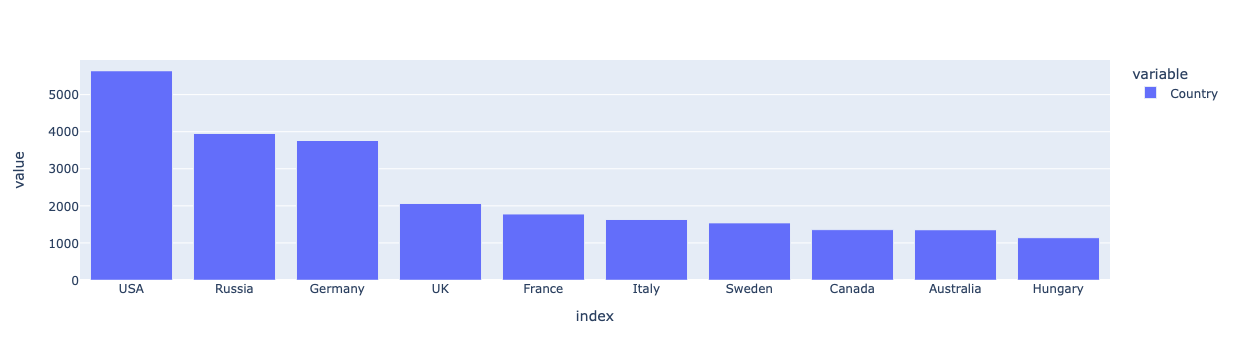

In [69]:
# Visualize the table as a bar chart
px.bar(top_10)